#### https://www.kaggle.com/jongbeomkim1219/porto-seguro-safe-driver-prediction
#### https://www.kaggle.com/rspadim/simple-denoise-autoencoder-with-keras

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('D:\python/porto-seguro-safe-driver-prediction/train.csv')

In [3]:
train

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [4]:
test=pd.read_csv('D:\python/porto-seguro-safe-driver-prediction/test.csv')

In [5]:
test

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892811,1488022,0,1,6,0,0,0,1,0,0,...,4,2,3,4,0,1,0,0,1,0
892812,1488023,5,3,5,1,0,0,0,1,0,...,6,2,2,11,0,0,1,1,0,0
892813,1488024,0,1,5,0,0,1,0,0,0,...,5,2,2,11,0,1,1,0,0,0
892814,1488025,6,1,5,1,0,0,0,0,1,...,1,1,2,7,1,1,0,0,0,0


### ind, reg, car, calc

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [7]:
train[train['target']==1]

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0
19,64,1,0,1,2,1,0,1,0,0,...,10,3,1,11,0,1,1,0,1,0
28,84,1,0,2,0,1,4,1,0,0,...,3,2,0,8,0,1,1,0,0,0
39,107,1,2,1,3,1,0,0,0,1,...,6,0,8,14,0,1,0,1,0,0
41,110,1,5,2,1,0,0,0,0,1,...,5,2,0,7,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595006,1487473,1,5,1,7,0,3,0,0,1,...,10,1,5,7,0,1,1,0,0,0
595046,1487566,1,1,1,5,0,0,0,0,1,...,9,2,1,5,0,1,0,0,0,0
595099,1487716,1,0,1,6,1,0,0,1,0,...,3,2,1,6,0,1,1,0,0,0
595113,1487748,1,0,2,2,0,0,1,0,0,...,5,0,4,4,0,0,1,0,1,0


In [8]:
for col in train.columns:
    print(col)

id
target
ps_ind_01
ps_ind_02_cat
ps_ind_03
ps_ind_04_cat
ps_ind_05_cat
ps_ind_06_bin
ps_ind_07_bin
ps_ind_08_bin
ps_ind_09_bin
ps_ind_10_bin
ps_ind_11_bin
ps_ind_12_bin
ps_ind_13_bin
ps_ind_14
ps_ind_15
ps_ind_16_bin
ps_ind_17_bin
ps_ind_18_bin
ps_reg_01
ps_reg_02
ps_reg_03
ps_car_01_cat
ps_car_02_cat
ps_car_03_cat
ps_car_04_cat
ps_car_05_cat
ps_car_06_cat
ps_car_07_cat
ps_car_08_cat
ps_car_09_cat
ps_car_10_cat
ps_car_11_cat
ps_car_11
ps_car_12
ps_car_13
ps_car_14
ps_car_15
ps_calc_01
ps_calc_02
ps_calc_03
ps_calc_04
ps_calc_05
ps_calc_06
ps_calc_07
ps_calc_08
ps_calc_09
ps_calc_10
ps_calc_11
ps_calc_12
ps_calc_13
ps_calc_14
ps_calc_15_bin
ps_calc_16_bin
ps_calc_17_bin
ps_calc_18_bin
ps_calc_19_bin
ps_calc_20_bin


###  중복확인

In [9]:
train.drop_duplicates()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [10]:
for col in test.columns:
    print(col)

id
ps_ind_01
ps_ind_02_cat
ps_ind_03
ps_ind_04_cat
ps_ind_05_cat
ps_ind_06_bin
ps_ind_07_bin
ps_ind_08_bin
ps_ind_09_bin
ps_ind_10_bin
ps_ind_11_bin
ps_ind_12_bin
ps_ind_13_bin
ps_ind_14
ps_ind_15
ps_ind_16_bin
ps_ind_17_bin
ps_ind_18_bin
ps_reg_01
ps_reg_02
ps_reg_03
ps_car_01_cat
ps_car_02_cat
ps_car_03_cat
ps_car_04_cat
ps_car_05_cat
ps_car_06_cat
ps_car_07_cat
ps_car_08_cat
ps_car_09_cat
ps_car_10_cat
ps_car_11_cat
ps_car_11
ps_car_12
ps_car_13
ps_car_14
ps_car_15
ps_calc_01
ps_calc_02
ps_calc_03
ps_calc_04
ps_calc_05
ps_calc_06
ps_calc_07
ps_calc_08
ps_calc_09
ps_calc_10
ps_calc_11
ps_calc_12
ps_calc_13
ps_calc_14
ps_calc_15_bin
ps_calc_16_bin
ps_calc_17_bin
ps_calc_18_bin
ps_calc_19_bin
ps_calc_20_bin


In [11]:
 train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


In [12]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


## meta 정보를 DataFrame에 저장
### 분석, 시각화, 모델링시 유용
#### role--->input, id, target
#### level---->nominal, interval, ordinal, binary
#### keep----> True, False
#### dtype ----> int,float

In [13]:
data=[]

for i in train.columns:
    if i =='target':
        role='target'
    elif i =='id':
        role='id'
    else:
        role='input'
        
    
    if 'bin' in i or i=='target':
        level='binary'
    elif 'cat' in i or i=='id':
        level='nominal'
    elif train[i].dtype=='float64':
        level='interval'
    elif train[i].dtype=='int64':
        level='ordinal'
    
    keep=True
    if i=='id':
        keep=False
    
    dtype=train[i].dtype
    
    dict={
        'varname':i,
        'role':role,
        'level':level,
        'keep':keep,
        'dtype':dtype
    }
    data.append(dict)
    
meta=pd.DataFrame(data,columns=['varname','role','level','keep','dtype'])
meta.set_index('varname',inplace=True)

In [14]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [15]:
meta[(meta.level =='nominal') &(meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [16]:
pd.DataFrame({"count":meta.groupby(['role','level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


In [17]:
v=meta[(meta.level=='interval')&(meta.keep)].index

#### 평균 , 표준편차등 계산

In [18]:
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


In [19]:
train[v].describe(percentiles=[.01,.25,.75,.99])

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,-1.000000,0.315595,0.448301,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
99%,0.900000,1.700000,1.852195,0.565685,1.617617,0.523450,3.741657,0.900000,0.900000,0.900000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


# -1은 결측치,    column에 결측치가 있음을 확인
### reg에서 reg3만 -1. car에서  12,14 -1  calc는 값들이 비슷비슷하다.고민

In [20]:
w=meta[(meta.level=='ordinal')&(meta.keep)].index
train[w].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


#### car 11만 결측치가 있다. scaling 가능

In [21]:
v=meta[(meta.level=='binary')&(meta.keep)].index

In [22]:
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 평균들이 거의다 0, 이는 imbalance

# target=1 이 target =0 보다 현저하게 적으므로, acc 가 좋아 보있수 있다.

# 이를 해결하기 위해 under-sampling, over-sampling 이 있다
### under-sampling: 불균형한 데이터셋에서 높은 비율을 차지하던 클래스의 수를 줄이므로서 불균형을 해소
### over-sampling: 낮은 비율을 차지하는 데이터셋을 늘리므로서 불균형을 해소--->under sampling 보다 좋은 방법이지만 어떻게 데이터를 생성하지를 해결해야한다.

In [23]:
target_count=train.target.value_counts()

In [24]:
print('Class: 0: ',target_count[0])
print('Class: 1: ',target_count[1])
print('Proportion:',round(target_count[0]/ target_count[1],2),':1') #반올림, 소수점 2째자리 까지

Class: 0:  573518
Class: 1:  21694
Proportion: 26.44 :1


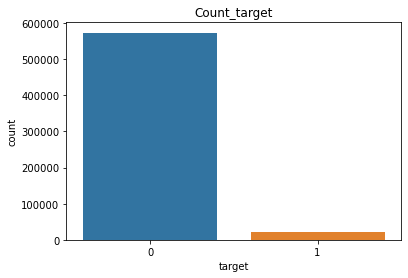

In [25]:
plt.title("Count_target")
sns.countplot(x='target',data=train)
plt.show()

## accuracy_score같은 간단한 항목을 사용하면 오해의 소지가 생긴다. 불균형 데이터 세트를 처리할때 발생하는 주요 문제중 하나는 모델을 평가하는데 사용되는 metric과 관련.
### 분류기가 학습하지 않고 class를 예측하면 높은 정확도를 갖는다.

In [26]:
from xgboost import XGBClassifier 
# 여러 개의 결정 트리를 임의적으로 학습하는 앙상블의 부스팅 유형
# 순차적 학습 방법=> 약한 분류기를 강한 분류기로 만듦
# 분류정확도는 높으나, outlier가 취약

# -outlier
# 이상치/특이치-관측된 데이터 중 특이하게 평균 데이터값과 크게 다른 데이터를 말한다
# 이러한 데이터 머신러닝/딥러닝 모델이 학습하는 과정이 입력되면 wegiht가 급격하게 커지거나 작아질수 있다.
# 그러므로 제거는 필수 적이다.
# outlier가 탐지되어 불필요하다면 outlier데이터의 class diversity가 아주 높아야한다.
# 다시말하자면 outlier 데이터가 100개 감지되면 그중 5:5 비율이여야 불필요한 outlier이다. 

In [27]:
from sklearn.model_selection import train_test_split

# from sklearn.model_selection import train_test_split
# train_test_split(arrays,test_size,train_size, random_state, shuffle, stratify)

# 1)Parameter
# arrays: 분할시킬 데이터를 입력(list,array, dataFrame)
# test_size: 테스트 데이터셋의 비율(float)이나, 갯수(int)(default=0.25)
# train_size: 학습 데이터셋의 비율,갯수 (default=0.75)
# random_state: 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값(int나 RandomState로 입력)
# shuffle: 셔플 여부 결정 (shuffle=True, or shuffle=Flase)
# stratify:  지정한 Data의 비율을 유지, ex) Label Set인 Y가 25%의 0과 75%의 1로 이루어진 
# Binary Set 일때, stratify=Y로 설정하면 나누어진 데이터셋들도 0 과 1 을 각각 25%,75%로 유지한채 분할된다.

# 2)Return
# X_train,X_test,y_train,y_test: arrays데이터와 레이블을 둘다 넣었을 경우의 반환이며, 데이터와 레이블의 순서쌍은 유지된다.
# X_train,X_test: arrays에 레이블 없이 데이터만 넣었을 경우의 반환


from sklearn.metrics import accuracy_score

In [28]:
labels=train.columns[2:]

In [29]:
X=train[labels]
Y=train['target']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

model=XGBClassifier()

In [30]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: %.2f%%"%(accuracy*100.0))

C:\Users\seonwoo\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:27:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 96.35%


# 한개의 feafure 만을 사용해서 accuracy를 보면

In [31]:
model=XGBClassifier()
model.fit(X_train[['ps_ind_14']],y_train)
y_pred=model.predict(X_test[['ps_ind_14']])

accuracy=accuracy_score(y_test,y_pred)
print("Accuray: %.2f%%" %(accuracy *100.0))

[17:29:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuray: 96.36%


In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
conf_mat=confusion_matrix(y_test,y_pred) # y_test 실제값, y_pred : 예측값
print('Confusion matrix:\n',conf_mat)

Confusion matrix:
 [[114709      0]
 [  4334      0]]


### https://blog.naver.com/letmegrow/222106735856

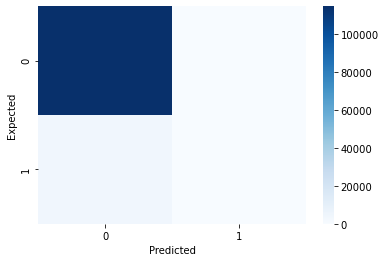

In [34]:
labels=['Class 0','Class 1']

fig= plt.figure()
ax=fig.add_subplot(111)
sns.heatmap(conf_mat, cmap=plt.cm.Blues)
ax.set_xlabel(['']+labels)
ax.set_ylabel(['']+labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()


#### over-sampling은 소수의 클래스에서 임의의 record(행)을 복제하기 때문에 over-fitting을 유발할수 있다.
#### under-sampling은 다수의 클래스에서 임의의 record를 제거하므로 정보 손실이 발생할수 있다.


In [35]:
# Resampling
count_class_0,count_class_1=train.target.value_counts()# value_count(): 유이란 값 개수 세기


In [36]:
df_class_0=train[train['target']==0]
df_class_1=train[train['target']==1]

print(count_class_0,count_class_1)

573518 21694


In [37]:
df_class_0_under=df_class_0.sample(n=count_class_1)
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)# 문자열과 문자열을 합친 값을 리턴한다.

In [38]:
print("Random under-sampling:")
print(df_test_under.target.value_counts())

Random under-sampling:
1    21694
0    21694
Name: target, dtype: int64


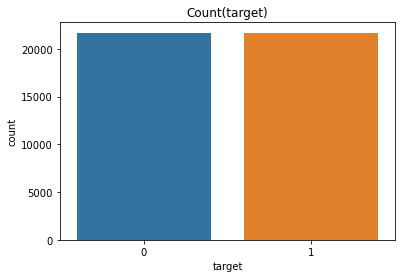

In [39]:
sns.countplot(x=df_test_under['target'])
plt.title('Count(target)')
plt.show()

In [40]:
df_class_1_over=df_class_1.sample(n=count_class_0,replace=True)
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)

print("Random over-sampling:")
print(df_test_over.target.value_counts())

Random over-sampling:
1    573518
0    573518
Name: target, dtype: int64


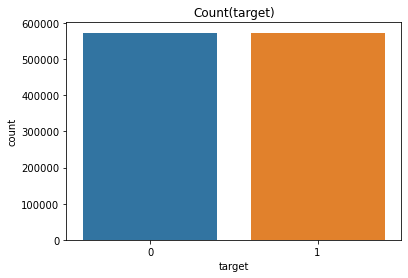

In [41]:
sns.countplot(x=df_test_over['target'])
plt.title('Count(target)')
plt.show()

# 정교한 Resampling
### under-sampling: 다수의 클래스의 record(행 데이터)를 clustering하고 각 cluster에서 record를 제거하여 under-sampling을 수행하여 정보를 보존할수 있다.
### over-sampling: 소수 클래스 record의 정확한 복수본을 만드는 대신 복사본에 작은 변형을 도입하여 더 다양한 합성 샘플을 만들수있다.


#### from sklearn.decomposition import PCA --> 고차원 데이터를 2차원으로 축소

#### from imblearn.under_sampling import RandomUnderSampler --> undersampling

#### from imblearn.over_sampling import RandomOverSampler --> oversampling

#### from imblearn.under_sampling import TomekLinks --> 매우 가까운 instance 쌍이지만 반대클라스, 각쌍의 다수 클래스 인스턴스를 제거하면서 두 클래스 사이의 공간이 늘어나 classification 이 용이

#### from imblearn.under_sampling import ClusterCentroids -->clustering 방법을 기반으로 centroid를 생성하여 under-sampling 을 수행, 정보를 보존하기 위해 데이터는 유사성에 따라 그룹화 된다.

#### from imblearn.over_sampling import SMOTE -->적은 데이터 셋에 있는 개별 데이터들의 K최근접 아웃(K Nearest Neighbor)을 찾아서, 이 데이터와 K개 이웃들의 차이를 일정 값으로 만들어서 기존 데이터와 약간 차이가 나는 새로운 데이터를 생성한다. synthetic minority oversampling technique

#### https://mkjjo.github.io/python/2019/01/04/smote_duplicate.html

#### from imblearn.combine import SMOTETomek--> SMOTE과 Tomek links기술을 이용하여 over,under sampling 한다.

In [42]:
from sklearn.utils import shuffle

In [43]:
desired_apriori=0.10

idx_0=train[train.target==0].index
idx_1=train[train.target==1].index

n0=len(train.loc[idx_0])
n1=len(train.loc[idx_1])
print(n0*0.1)
print(0.9*n1)
undersampling_rate=((1-desired_apriori)*n1)/(n0*desired_apriori)# 0.9*n1/0.1*n0

undersampled_n0=int(undersampling_rate * n0)

print('Rate to undersample records with target=0:{}'.format(undersampling_rate))

print('Number of records with target=0 after undersampling: {}'.format(undersampled_n0))

undersampled_idx=shuffle(idx_0,random_state=37, n_samples=undersampled_n0)

idx_list=list(undersampled_idx)+list(idx_1)

train=train.loc[idx_list].reset_index(drop=True)

57351.8
19524.600000000002
Rate to undersample records with target=0:0.34043569687437886
Number of records with target=0 after undersampling: 195246


In [55]:
ntrain=train.shape[0]
ntest=test.shape[0]
y_train=train.target.values

In [54]:
print(ntrain,ntest,y_train)

216940 892816 [0 0 0 ... 1 1 1]


### 결측치 확인

In [46]:
ntrain=train.shape[0]
ntest=test.shape[0]
y_train=train.target.values
vars_with_missing=[]

for i in train.columns:
    missing=train[train[i]==-1][i].count()
    
    if missing >0:
        vars_with_missing.append(i)
        missing_perc=missing/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(i,missing,missing_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


In [47]:
#ps_car_03_cat,ps_car_05_cat 은 결측치가 많다.

#ps_reg_03은 결측치가 18% 평균으로 채우고
#ps_car_11은 결측치가 1개  최빈값으로 채우고
#ps_car_2_cat은 결측치 2개 ,평균으로 채우고
#ps_car_14은 결측치 7%, 평균으로 채운다.

In [48]:
vars_to_drop=['ps_car_03_cat','ps_car_05_cat']

train.drop(vars_to_drop,inplace=True, axis=1)
test.drop(vars_to_drop, inplace=True, axis=1)

meta.loc[(vars_to_drop),'keep']=False

In [49]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [ ]:
from sklearn.impute import SimpleImputer
# 특성에 값이 없을때도 있고 없을때도 있다,
#그 구역을 제거하거나, 전체 특성을 지워버리거나, 어떤 값으로 채우거나 해야한다.
# missing_values 매개 변수에 NaN을 지정할때 문자열 'NaN' 이 아니라 np.nan을 사용한다.
# stratygy 매개변수에 mean, median,most_frequent 외에 constant가 추가 되었다.
#stratygy='constant' 일때 ,fill_value 매개변수에 채우려는 값을 지정
# SimpleImputer 에는 aixs 매개변수가 없다. 기본 동작 방식은 행 방향으로 대체할 값응ㄹ 계산하려면 FuctionTransformer를 사용하여 처리할수있다.

In [51]:
mean_imp=SimpleImputer(missing_values=-1,strategy='mean')
mode_imp=SimpleImputer(missing_values=-1,strategy='most_frequent')

train['ps_reg_03']=mean_imp.fit_transform(train[['ps_reg_03']]).ravel()#ravel()은 1차원으로 변환하는 역할
train['ps_car_02_cat']=mean_imp.fit_transform(train[['ps_car_02_cat']]).ravel()
train['ps_car_14']=mean_imp.fit_transform(train[['ps_car_14']]).ravel()

train['ps_car_11']=mode_imp.fit_transform(train[['ps_car_11']]).ravel()


mean_imp=SimpleImputer(missing_values=-1,strategy='mean')
mode_imp=SimpleImputer(missing_values=-1,strategy='most_frequent')

test['ps_reg_03']=mean_imp.fit_transform(test[['ps_reg_03']]).ravel()
test['ps_car_02_cat']=mean_imp.fit_transform(test[['ps_car_02_cat']]).ravel()
test['ps_car_14']=mean_imp.fit_transform(test[['ps_car_14']]).ravel()

test['ps_car_11']=mode_imp.fit_transform(test[['ps_car_11']]).ravel()


In [56]:
# variable 에 있는 고유한 값들의 개수를 확인하고 
# dummy variable을 만들 것이므로, 고유 값이 많은 variable 이 있는지 확인
# 이러한 변수는 많은 dummy variable을 생성하므로 다르게 처리

In [52]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = len(train[f].unique())
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


#### distinct value가 104인  ps_car_11_cat는 mean encoding 을 적용해야한다.

#### 범수형 변수를 인코인 하는 방식
1. one-hot-encoding----> 변수에 순서가 부여되지 않기때문에 target을 예측하는데 영향을 주진 않지만, unique값이 많을 경우 sparse(0값을 가리치는) 벡터가 생성되고 , feafure도 기하급수적으로 늘어나기 때문에 cost가 늘어나고...
2. Label-encoding---->  feafure가 유지되기 때문에 cost가 적고 차원을 신경쓸필요없지만, unique 값에 매핑되는 숫자에 순서가 생겨버리기때문에 target 예측에 영향을 줄수있다.

3. mean-encoding ----> 데이터 학습울 위해 차원이 증가하면서 학습 데이터 수가 차원의 수보다 적어져 성능이 저하되는 확률이 없어지고 빠르다. 하지만 data leakage( 완전히 잘못된 예측 모델이 만들어지거나, 지나치게 좋은 결과(오버피팅,과적합)이 나올수있다.


In [62]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))


def target_encode(trn_series = None, tst_series=None, target = None, min_samples_leaf = 1,
                  smoothing = 1, noise_level = 0):

    # assert 문은 프로그램의 내부 점검이다. 표현식이 참이 아니면 AssertionError 예외가 발생한다.
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    
    temp = pd.concat([trn_series, target], axis=1)
    '''
    ps_car_11_cat  target
0                  26       0
1                 104       0
2                  15       0
3                  74       0
4                  78       0
...               ...     ...
216935            104       1
216936              5       1
216937            104       1
216938            104       1
216939             57       1

    '''

    # trn_series.name 은 여기서 ps_car_11_cat, target.name 은 여기서 target
    # ps_car_11_cat 의 같은 값끼리 묶고 묶었을 때의 target 값의 평균과 class 별 개수를 count 한다.
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])

    # 오버피팅 방지를 위해 smoothing 을 추가한다.
    # https: // en.wikipedia.org / wiki / Exponential_smoothing
    # smoothing 변수는 alpha 를 의미

    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    prior = target.mean()
    # https: // www.kaggle.com / vprokopev / mean - likelihood - encodings - a - comprehensive - study
    # Where  pc  is a target mean for a category,  nc  is a number of samples in a category,
    # pglobal  is a global target mean
    # and  α  is a regularisation parameter that can be viewed as a size of a category you can trust.
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing

    # mean 과 count column은 필요 없어서 삭제
    averages.drop(["mean", "count"], axis=1, inplace=True)


    # Apply averages to trn and tst series
    # merge 함수는 두 데이터 프레임을 각 데이터에 존재하는 고유값(key) 을 기준으로 병합할 때 사용한다.
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name), # ps_car_11_cat 의 값들과
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    # on=trn_series.name -> ps_car_11_cat 에서 같은 값을 join
    # how='left' -> trn_series.to_frame(trn_series.name) 을 기준으로 merge
    # 즉, train data 의 ps_car_11_cat 에서 각 고유값에 해당하는 평균 값을 넣어주는 과정
    # Nan이 발생한 경우, 전체 target에 대한 평균을 넣어준다.


    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index
    
    
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    # pd.merge 가 index를 유지하지 않기 때문에 index를 저장해둔다.
    ft_tst_series.index = tst_series.index


    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [63]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"],
                             test["ps_car_11_cat"],
                             target=train.target,
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)

train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat', 'keep'] = False  # drop 했으므로, meta 데이터를 업데이트 시켜준다.
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

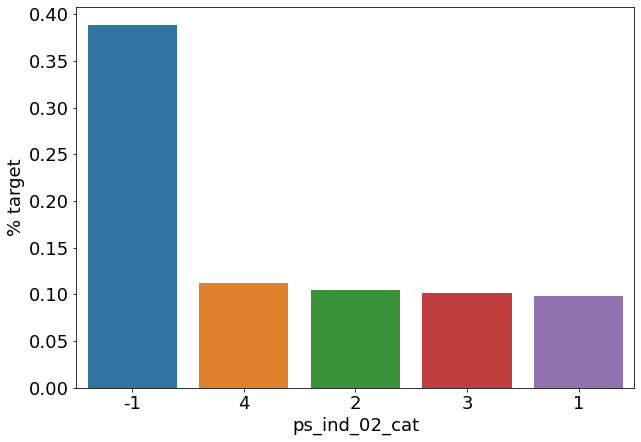

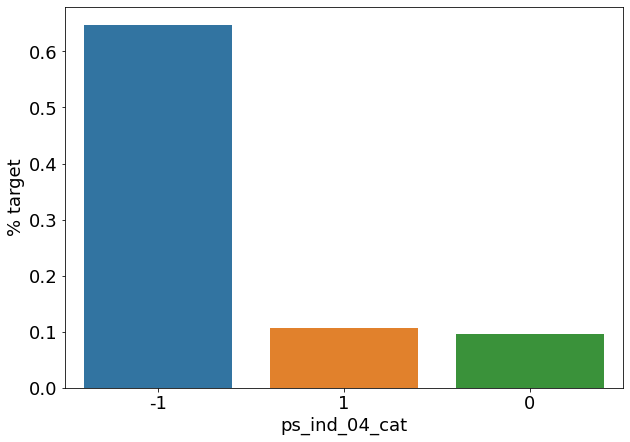

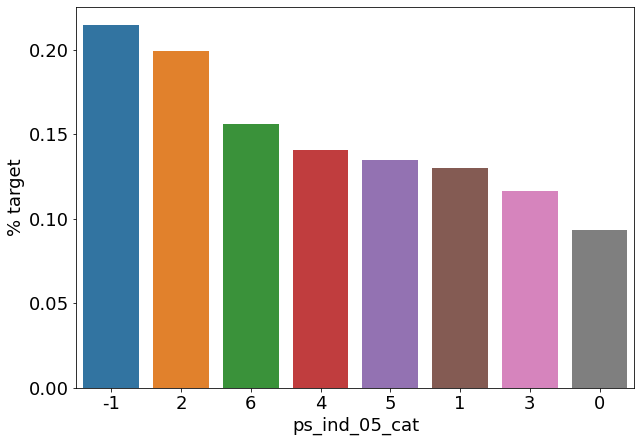

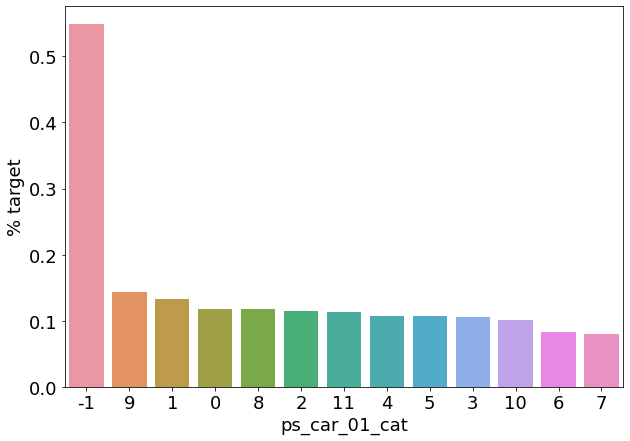

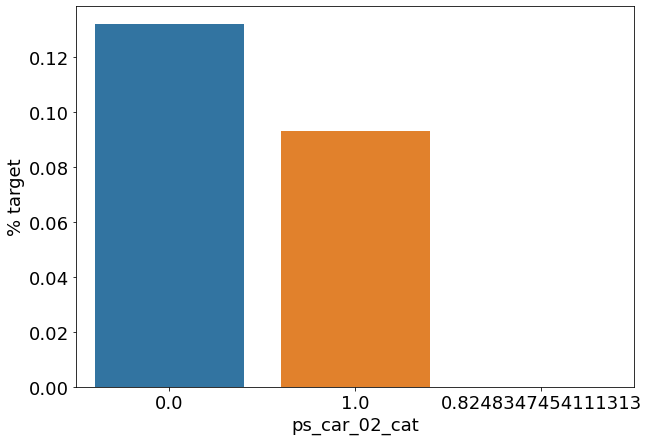

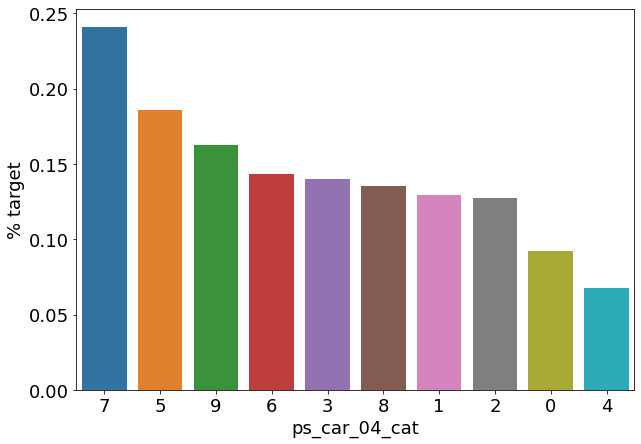

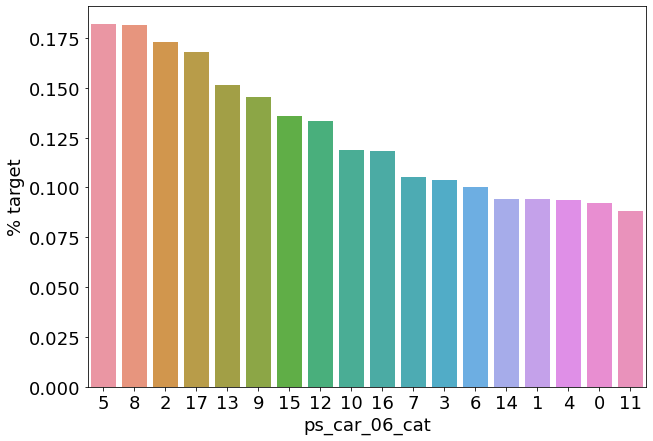

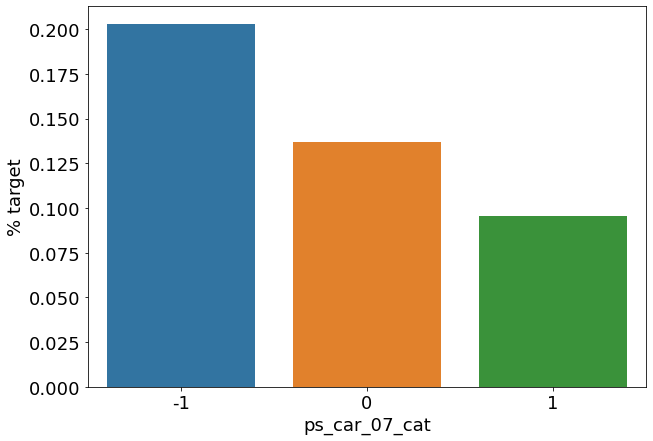

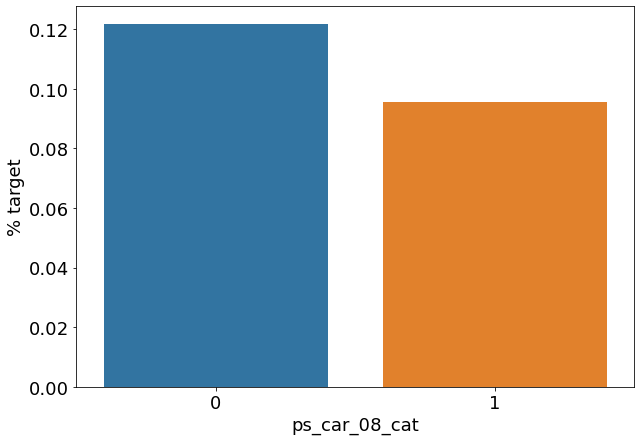

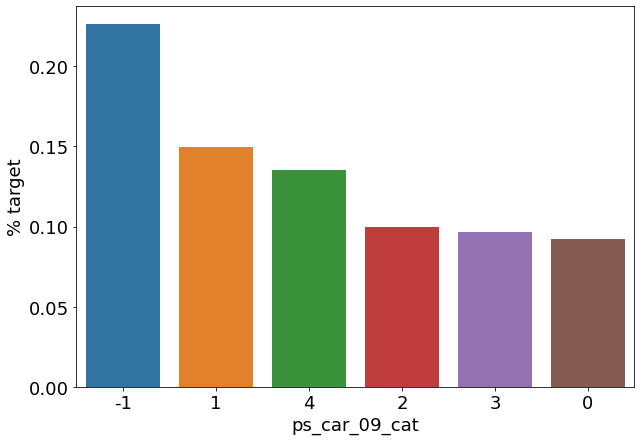

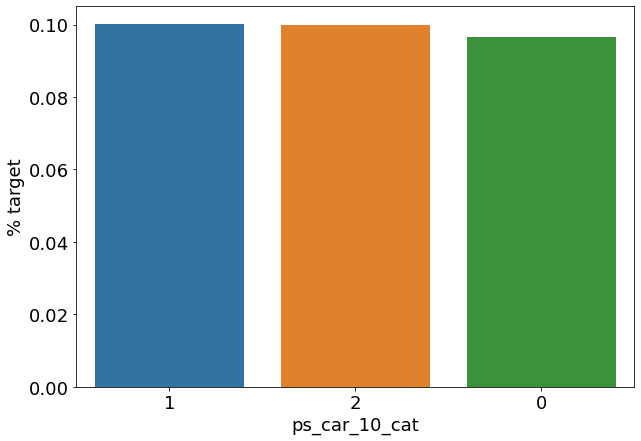

In [64]:
v = meta[((meta.level == 'nominal') & (meta.keep))].index

for f in v:
    fig, ax = plt.subplots(figsize=(10,7))

    # 각 column 별 target=1 의 percentage 계산
    # 각 column 과 target 값을 따로 추출해서
    # 만들어진 dataframe 을 column 에서의 같은 값을 기준으로 groupby 를 하여, target 의 평균을 계산
    '''
            ps_car_09_cat  target
0                   2     0.0
1                   2     0.0
2                   2     0.0
3                   0     0.0
4                   0     0.0
...               ...     ...
216935              2     1.0
216936              2     1.0
216937              1     1.0
216938              2     1.0
216939              2     1.0
    '''
    # 위와 같이 만들어지면, 이를 ps_car_09_cat 에서 같은 값으로 groupby 하여 target 값을 평균낸다.
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    '''
    ps_car_09_cat    target
0             -1  0.226087
1              0  0.092161
2              1  0.149783
3              2  0.099636
4              3  0.096570
5              4  0.135338
    '''
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # barplot
    # target mean 을 내림차순으로 그림
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show()

In [65]:
plt.clf()

<Figure size 432x288 with 0 Axes>

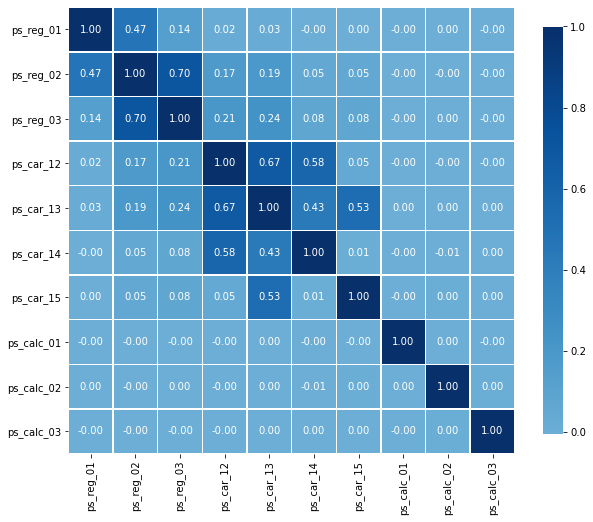

In [66]:
def corr_heatmap(v):
    correlations = train[v].corr()

    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(correlations, cmap='Blues', vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75}, ax=ax)
    plt.show()
    
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

#### ps_reg_03,ps_reg_02 은 0.7로 높은 correalation(상관관계)를 보인다. 
#### ps_car_13, ps_car_12은 0.67
#### ps_car_14, ps_car_12은 0.58
#### ps_car_14,ps_car_13은 0.43
#### ps_car_15, ps_car_13은 0.53
#### ps_reg_02, ps_reg_01은 0.47

# piar plot
#### 변수 간의 관계를 시각화할수있다.
#### heat map에서 변수간의 높은 상관관계를 보였기때문에 높은 변수 위주로 pairplot를 그린다.

In [69]:
s = train.sample(frac=0.1)

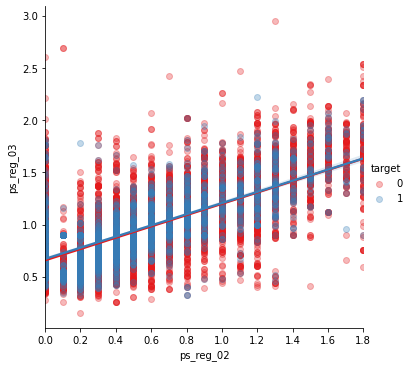

In [70]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

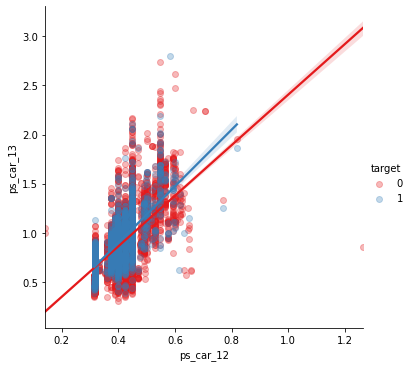

In [72]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

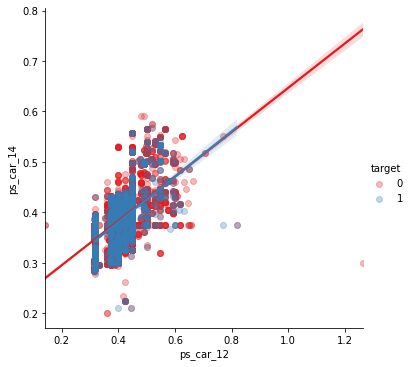

In [73]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

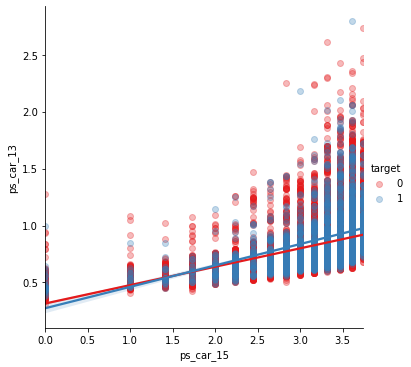

In [74]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

# correlation

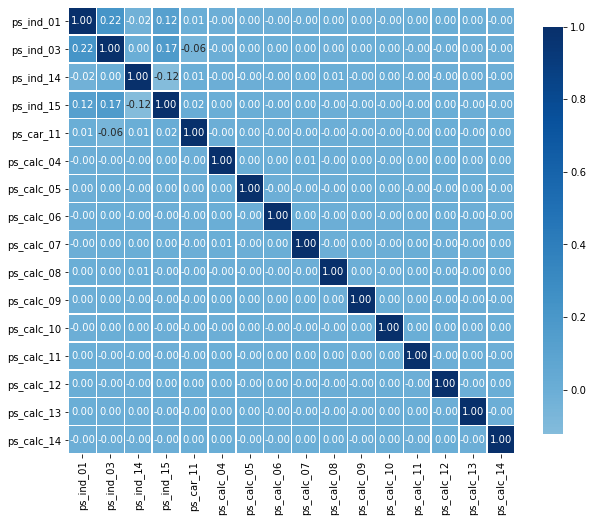

In [75]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

In [77]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
print('Before dummification we have {} variables in test'.format(test.shape[1]))

train = pd.get_dummies(train, columns=v, drop_first=True)
test = pd.get_dummies(test, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))
print('After dummification we have {} variables in test'.format(test.shape[1]))

Before dummification we have 57 variables in train
Before dummification we have 56 variables in test
After dummification we have 109 variables in train
After dummification we have 108 variables in test


In [79]:
from sklearn.preprocessing import PolynomialFeatures
"""
데이터가 단순한 직선의 형태가 아닌 비선형 형태여도, 선형모델을 사용하여 비선형 데이터를 학습할수있는데, 이때 
각 특성의 거듭 제곱을 새로운 특성으로 추가하고, 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는것
이 기법은 다항회귀(Polynomial Regression)
"""

In [80]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True)

In [82]:
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
test = pd.concat([test, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 109 variables in train
After creating interactions we have 164 variables in train


예측 모델에서 중요한 특성은 타겟과의 상관관계가 큰특성을 의미한다.
상관관계에 앞서 어떤 특성의 값 자체가 표본에 따라 변하지 않는다면, 예측에 도움이안될 가능성이 높다. 따라서 표본 변화에 따른 데이터 값의 변화량(분산이 기준치보다 낮은 특성)을 제거해야하는 해야한다.

In [86]:
from sklearn.feature_selection import VarianceThreshold

In [87]:
selector = VarianceThreshold(threshold=0.01)
selector.fit(train.drop(['id', 'target'], axis=1)) # id 와 target 을 제외하고 fit 한다.

# get_support() 하면 True,False값이 나오는데 이중에서 False값만 반환하기위해 f함수지정
f = np.vectorize(lambda x : not x)

v = train.drop(['id','target'],axis=1).columns[f(selector.get_support())]

print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

29 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_02_cat_0.8248347454111313', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


In [89]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier
. 기본 결정트리는 해당 데이터에 대해 맞춰서 분류를 진행하는 것이기 때문에 과적합 현상이 나타난다.

이를 개선하기 위해 앙상블기법으로 고안된 것

훈련 과정에서 구성한 다수의 결정트리들을 랜덤하게 학습시켜 분류 또는 회귀의 결과도출에 사용된다.
즉,특정 특성을 선택하는 트리를 여러개 생성하여 이들을 기반으로 작업을 수행하는 것
각각의 트리가 독립적으로 학습하기 때문에 학습과정을 병렬화할수있다.

일반적인 의사결정트리는 Tree Correlation은 x feafure 하나가 정답에 많은 영향을 주게되면서 대부분의 결과치가 유사하게 나타나는 문제점이있다.

하지만 RandomForestClassifier 은 위의 문제를 해결했고 파라미터의 개수가 적어 튜닝도 쉽다.




In [90]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

id_test = test['id']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_11_cat_te               0.021154
 2) ps_car_13                      0.017379
 3) ps_car_13^2                    0.017308
 4) ps_car_12 ps_car_13            0.017277
 5) ps_car_13 ps_car_14            0.017209
 6) ps_reg_03 ps_car_13            0.017117
 7) ps_reg_01 ps_car_13            0.016821
 8) ps_car_13 ps_car_15            0.016788
 9) ps_reg_03 ps_car_14            0.016231
10) ps_reg_03 ps_car_12            0.015659
11) ps_reg_03 ps_car_15            0.015293
12) ps_car_14 ps_car_15            0.015091
13) ps_car_13 ps_calc_01           0.014795
14) ps_car_13 ps_calc_03           0.014727
15) ps_reg_02 ps_car_13            0.014718
16) ps_reg_01 ps_reg_03            0.014701
17) ps_car_13 ps_calc_02           0.014659
18) ps_reg_01 ps_car_14            0.014360
19) ps_reg_03^2                    0.014247
20) ps_reg_03                      0.014194
21) ps_reg_03 ps_calc_03           0.013798
22) ps_reg_03 ps_calc_02           0.013775
23) ps_reg_03 ps_calc_01        

In [93]:
from sklearn.feature_selection import SelectFromModel

In [94]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))

n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

train = train[selected_vars + ['target']]
test = test[selected_vars]

Number of features before selection: 162
Number of features after selection: 81


In [95]:
X = train.drop(['target'],axis=1).values
y = train['target'].values

X_test = test.values

In [96]:
def eval_gini(y_true, y_pred):
    # 실제 값과 예측 값이 동일한 크기인지 확인합니다 (다른 값으로 인해 오류가 발생 함).
    assert y_true.shape == y_pred.shape

    n_samples = y_true.shape[0] # 데이터 수
    L_mid = np.linspace(1 / n_samples, 1, n_samples) # 대각선 값
    # 1 / n_samples 에서 1 까지 n_samples 만큼의 개수의 수를 생성

    # 1) 예측 값에 대한 지니 계수
    pred_order = y_true[y_pred.argsort()] # y_pred 크기로 y_true 값 정렬
    L_pred = np.cumsum(pred_order) / np.sum(pred_order) # Lorentz Curve  # cumsum 은 누적합을 의미
    G_pred = np.sum(L_mid - L_pred) # 예측값에 대한 지니 계수 (A 영역)

    # 2) 예측이 완벽 할 때의 지니 계수
    true_order = y_true[y_true.argsort()] # y_pred 크기로 y_true 값 정렬
    L_true = np.cumsum(true_order) / np.sum(true_order) # Lorentz Curve
    G_true = np.sum(L_mid - L_true) # 예측이 완벽 할 때의 지니 계수 (A+B 영역)

    # 정규화 된 지니 계수
    return G_pred / G_true

def gini_lgb(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds), True


def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds)

In [97]:
from sklearn.model_selection import StratifiedKFold

# Stratified K Fold Cross-Verifier 만들기 (5등분 해 줌)
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1991)

In [99]:
max_params_lgb = {'bagging_fraction': 0.8043696643500143, # 데이터를 샘플링하는 비율로, 트리가 커져서 과대적합되는 것을 제어한다.
 'feature_fraction': 0.6829323879981047, # 개별 트리를 학습할 때나다 무작위로 선택하는 피처의 비율
 'lambda_l1': 0.9264555612104627, # L1 규제 (클수록 과적합 감소)
 'lambda_l2': 0.9774233689434216, # L2 규제 (클수록 과적합 감소)
 'min_child_samples': 10, # 리프 노드가 되기 위한 최소한의 샘플 데이터 수
 'min_child_weight': 125.68433948868649, 
                  # 트리에서 추가적으로 가지를 나눌지 결정하기 위해 필요한 데이터들의 weight 총합 해당 값이 클수록 분할이 잘 안 일어난다.
 'num_leaves': 28, # 하나의 트리가 가질 수 있는 최대 리프 개수 
 'objective': 'binary', # 손실함수 정의
 'learning_rate': 0.01, # 학습률
 'bagging_freq': 1, # bagging 빈도
                  # 0은 bagging 비활성화를 의미하고 k는 k 반복마다 bagging을 수행함을 의미한다.
 'verbosity': 0, 
 'random_state': 1991}

import lightgbm as lgbm

# OOF-trained model 로 검증 데이터 대상 값을 예측하기 위한 1차원 확률 배열
oof_val_preds_lgb = np.zeros(X.shape[0])
# OOF-trained model 로 검증 데이터 대상 값을 예측하기 위한 1차원 확률 배열
oof_test_preds_lgb = np.zeros(X_test.shape[0])

# OOF 에 의한 Train, validate, and predict models
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # The phrase that separates each fold.
    print('#' * 40, f'Fold {idx + 1} out of {folds.n_splits}', '#' * 40)

    # train data, valid data 설정
    X_train, y_train = X[train_idx], y[train_idx]  # Train data
    X_valid, y_valid = X[valid_idx], y[valid_idx]  # Valid data

    # Create lgbm dataset
    dtrain = lgbm.Dataset(X_train, y_train)  # lgbm train dataset
    dvalid = lgbm.Dataset(X_valid, y_valid)  # lgbm valid dataset

    # Train LightGBM
    lgb_model = lgbm.train(params=max_params_lgb,  # 최적의 Hyper-parameters
                           train_set=dtrain,  # Train data
                           num_boost_round=1500,  # boosting 반복 횟수
                           valid_sets=dvalid,  # model 성능 평가를 위한 Valid data
                           feval=gini_lgb,  # validation 을 위한 evaluation metrics
                           early_stopping_rounds=150,  # Early stopping 조건 (150 회 동안 loss의 감소가 없으면 학습 중단)
                           verbose_eval=100)

    # 모델의 성능이 가장 좋은 경우 boosting 반복 횟수
    best_iter = lgb_model.best_iteration
    # test data 를 이용한 predict probabilities
    # (predict 한 값들의 평균)
    oof_test_preds_lgb += lgb_model.predict(X_test,
                                            num_iteration=best_iter) / folds.n_splits
    # 모델 성능 평가를 위한 OOF 예측
    oof_val_preds_lgb[valid_idx] += lgb_model.predict(X_valid, num_iteration=best_iter)

    # OOF 예측에 대한 정규화된 지니 계수
    gini_score = eval_gini(y_valid, oof_val_preds_lgb[valid_idx])
    print(f'Fold {idx + 1} gini score: {gini_score}\n')

######################################## Fold 1 out of 5 ########################################
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.109996 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 150 rounds
[100]	valid_0's binary_logloss: 0.319494	valid_0's gini: 0.219034
[200]	valid_0's binary_logloss: 0.318003	valid_0's gini: 0.226628
[300]	valid_0's binary_logloss: 0.317406	valid_0's gini: 0.231258
[400]	valid_0's binary_logloss: 0.317135	valid_0's gini: 0.233959
[500]	valid_0's binary_logloss: 0.317015	valid_0's gini: 0.235157
[600]	valid_0's binary_logloss: 0.316996	valid_0's gini: 0.235177
[700]	valid_0's binary_logloss: 0.316998	valid_0's gini: 0.235085
Early stopping, best iteration is:
[579]	valid_0's binary_logloss: 0.316991	valid_0's gini: 0.235387
Fold 1 gini score: 0.2353872309678516

######################################## Fold 2 out of 5 ################

In [100]:
max_params_xgb = {'colsample_bytree': 0.8927325521002059, # 트리 생성에 필요한 피처(칼럼)를 임의로 샘플링하는 데 사용된다.
                  # 매우 많은 피처가 있는 경우 과적합을 조정하는 데 사용된다.
 'gamma': 9.766883037651555, # 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값이다.
                  # 해당 값보다 손실(loss) 이 감소된 경우에 리프 노드를 분리한다. 값이 클수록 과적합 감소 효과가 있다.
 'max_depth': 7, # 트리 기반 알고리즘의 max_depth 와 같다. 0을 지정하면 깊이 제한이 없다. max_depth가 높으면 과적합 가능서이 높다.
                  # 보통 3~10 사이의 값을 적용한다.
 'min_child_weight': 6.0577898395058085, 
                  # 트리에서 추가적으로 가지를 나눌지 결정하기 위해 필요한 데이터들의 weight 총합 해당 값이 클수록 분할이 잘 안 일어난다.
 'reg_alpha': 8.136089122187865, # L1 규제 (feature의 개수가 많을 경우 적용을 검토하며, 값이 클수록 과적합 감소 효과가 있다.)
 'reg_lambda': 1.385119327658532, # L2 규제 (feature의 개수가 많을 경우 적용을 검토하며, 값이 클수록 과적합 감소 효과가 있다.)
 'scale_pos_weight': 1.5142072116395773, # 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터이다.
 'subsample': 0.717425859940308, # 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율을 지정한다.
 'objective': 'binary:logistic', # 손실함수 지정
 'learning_rate': 0.05, # 학습률
 'random_state': 1991}

import xgboost as xgb

# OOF-trained model 로 검증 데이터 대상 값을 예측하기 위한 1차원 확률 배열
oof_val_preds_xgb = np.zeros(X.shape[0])
# OOF-trained model 로 검증 데이터 대상 값을 예측하기 위한 1차원 확률 배열
oof_test_preds_xgb = np.zeros(X_test.shape[0])

# OOF 에 의한 Train, validate, and predict models
for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    # The phrase that separates each fold.
    print('#' * 40, f'Fold {idx + 1} out of {folds.n_splits}', '#' * 40)

    # train data, valid data 설정
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]

    # xgboost dmatrix 만들기
    dtrain = xgb.DMatrix(X_train, y_train)
    dvalid = xgb.DMatrix(X_valid, y_valid)
    dtest = xgb.DMatrix(X_test)

    watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

    xgb_model = xgb.train(params=max_params_xgb,
                          dtrain=dtrain,
                          num_boost_round=1000,
                          evals=watchlist,
                          maximize=True,
                          feval=gini_xgb,
                          early_stopping_rounds=150,
                          verbose_eval=100)

    # 모델의 성능이 가장 좋은 경우 boosting 반복 횟수
    best_iter = xgb_model.best_iteration
    # test data 를 이용한 predict probabilities
    # (predict 한 값들의 평균)
    oof_test_preds_xgb += xgb_model.predict(dtest,
                                            ntree_limit=best_iter) / folds.n_splits
    # 모델 성능 평가를 위한 OOF 예측
    oof_val_preds_xgb[valid_idx] += xgb_model.predict(dvalid, ntree_limit=best_iter)

    # OOF 예측에 대한 정규화된 지니 계수
    gini_score = eval_gini(y_valid, oof_val_preds_xgb[valid_idx])
    print(f'Fold {idx + 1} gini score: {gini_score}\n')

print('LightGBM OOF Gini Score:', eval_gini(y, oof_val_preds_lgb))
print('XGBoost OOF Gini Score:', eval_gini(y, oof_val_preds_xgb))


######################################## Fold 1 out of 5 ########################################
[19:59:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.66491	train-gini:0.14000	valid-logloss:0.66501	valid-gini:0.10633
[100]	train-logloss:0.32066	train-gini:0.31343	valid-logloss:0.32639	valid-gini:0.23131
[200]	train-logloss:0.31426	train-gini:0.37778	valid-logloss:0.32542	valid-gini:0.23068
[252]	train-logloss:0.31206	train-gini:0.40258	valid-logloss:0.32550	valid-gini:0.22941
Fold 1 gini score: 0.23131818447463354

######################################## Fold 2 out of 5 ########################################
[20:04:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St